# Lecture 4 - Intro to ML: PCA, t-SNE

## 1. Importing Libraries

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import seaborn as sn

from tensorflow.keras.datasets import mnist

## 2. Scikit-Learn Example

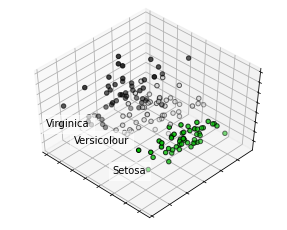

In [2]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

## PCA Implementation on MNIST

### Objective

1.1 Apply PCA to MNIST and see how many dimension you need in the embedded space for having 90%, 95% or 99% of variance explained.

In [2]:
def checkcheck(check):
    """
    Performs a check to see whether or not the three thresholds of % variance explained were reached
    """
    if check["90%"]==check["95%"]==check["99%"]==True: return True
    else: return False
    
def normalize(dataset):
    """
    Normalizes the values in an image array
    """
    return dataset/255.

In [ ]:
# Starts at 86 components because we already know that 90% is reached around 87 components

number_of_components = 86
components_explained_variance = {}

check = {"90%":False,"95%":False,"99%":False}

In [3]:
# Reads the dataset and split it beween train and test sets
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizes
x_train, x_test = normalize(x_train), normalize(x_test)

# Reformats to be acceptable by PCA
x_train = [np.concatenate(i) for i in x_train]
x_test = [np.concatenate(i) for i in x_test]

In [5]:
while not checkcheck(check):
    print(number_of_components)
    pca_model = decomposition.PCA(n_components=number_of_components, svd_solver='full')
    pca_model.fit(x_train)
    X_train_pca = pca_model.transform(x_train)
    X_test_pca = pca_model.transform(x_test)
    components_explained_variance[number_of_components] = [pca_model.components_,
                                                           pca_model.explained_variance_ratio_,
                                                           sum(pca_model.explained_variance_ratio_)]
    if sum(pca_model.explained_variance_ratio_)>=0.9 and check["90%"]==False:
        check["90%"] = True
        print(f"90% variance explained mark reached at {number_of_components} components")
    if sum(pca_model.explained_variance_ratio_)>=0.95 and check["95%"]==False:
        check["95%"] = True
        print(f"95% variance explained mark reached at {number_of_components} components")
    if sum(pca_model.explained_variance_ratio_)>=0.99 and check["99%"]==False:
        check["99%"] = True
        print(f"99% variance explained mark reached at {number_of_components} components")
    number_of_components += 1

86
87
90% variance explained mark reached at 87 components
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
95% variance explained mark reached at 154 components
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312

87 components:


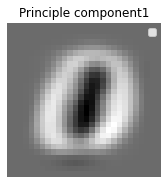

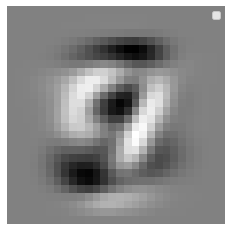

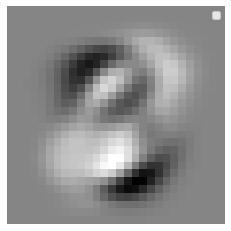

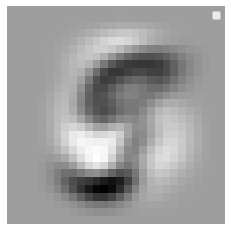

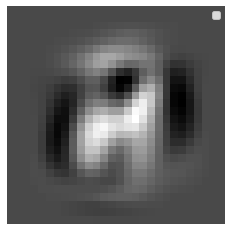

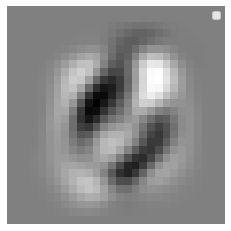

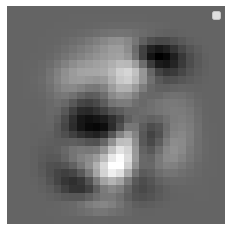

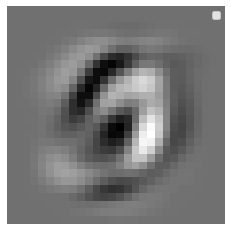

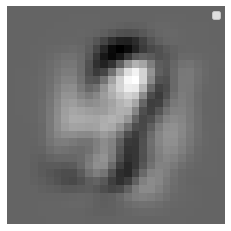

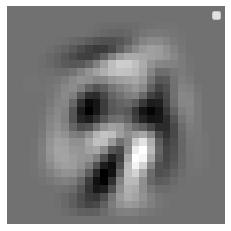

154 components:


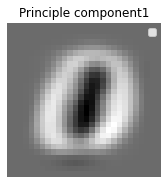

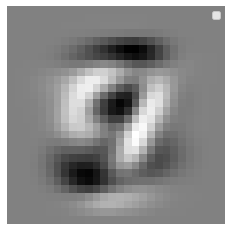

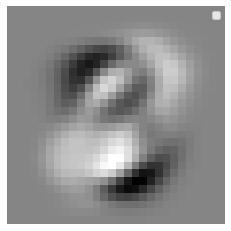

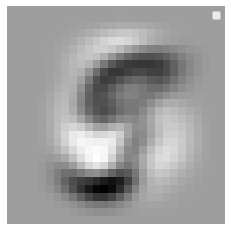

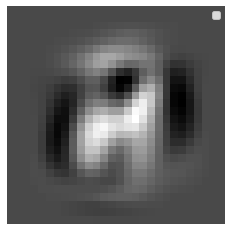

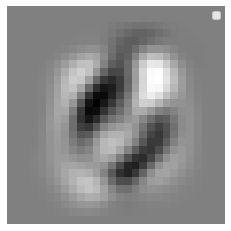

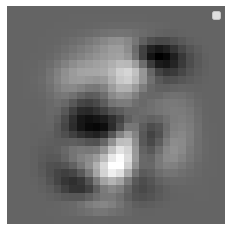

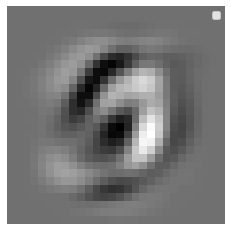

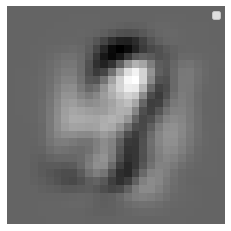

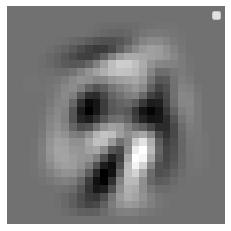

331 components:


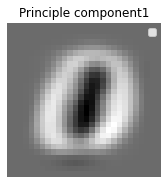

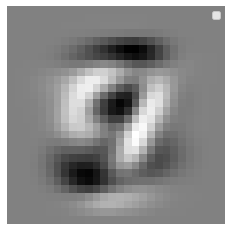

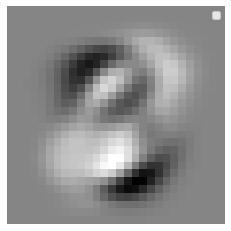

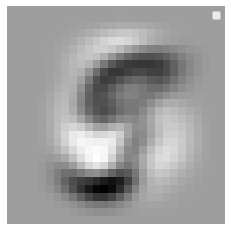

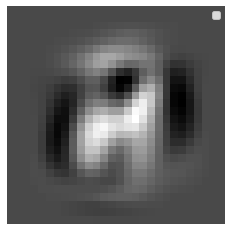

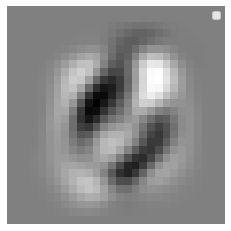

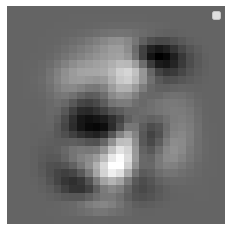

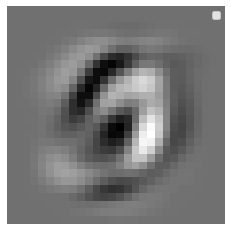

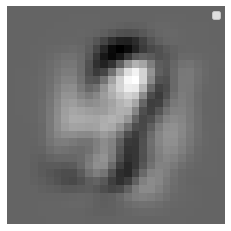

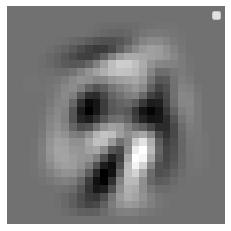

In [7]:
for status in [87, 154, 331]:
    print(f"{status} components:")
    PCA_components = components_explained_variance[status][0]
    fig = plt.figure(figsize=(16, 9))
    for i in range(0,10):
        ax = fig.add_subplot(2, 5, i+1)
        plt.imshow(PCA_components[i].reshape((28,28)),cmap='gray')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        plt.axis('off')
        plt.legend('off')
        ax.set_title('Principle component'+str(i+1))
        # x and y axis should be equal length
        x0,x1 = ax.get_xlim()
        y0,y1 = ax.get_ylim()
        plt.show()

In [9]:
components_explained_variance[87][2]

0.9001062226425084

In [10]:
components_explained_variance[154][2]

0.9501960192613033

In [11]:
components_explained_variance[331][2]

0.9900129426354095

## 2D visualization using PCA

### Objective
1.2 Reduce to PCA in dimension 2 and display the result (use different colors for the different classes

In [14]:
pca = decomposition.PCA(n_components=2)
pca_results = pca.fit_transform(x_train)

principalDf = pd.DataFrame(data = pca_results, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(data = y_train, columns = ['target'])], axis = 1)

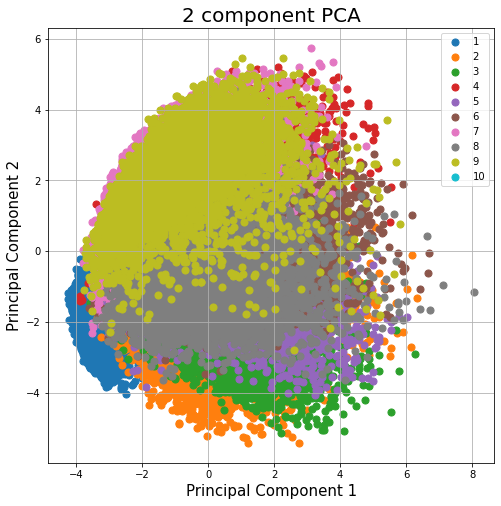

In [17]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = list(range(1,11))
for target in targets:
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)
ax.legend(targets)
ax.grid()

## t_SNE Implementation on MNIST

### Objective

Part 2: tSNE in dimension 2

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


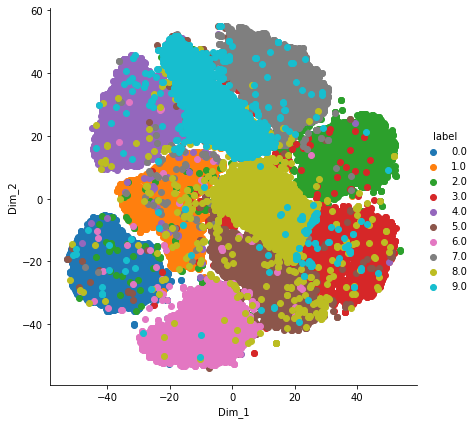

In [18]:
model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(x_train)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()